# Read dataset
Classes:
* 0: Flooded
* 1: Non-flooded

In [ ]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
transform = transforms.Compose(
    [transforms.Resize((256, 256)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataSet = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train', transform=transform) 
test_dataSet = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/val', transform=transform) 


torch.Size([3, 256, 256])
label:  0
Number of images in augmented_dataSet_train:  736
Number of images in augmented_dataSet_test:  186


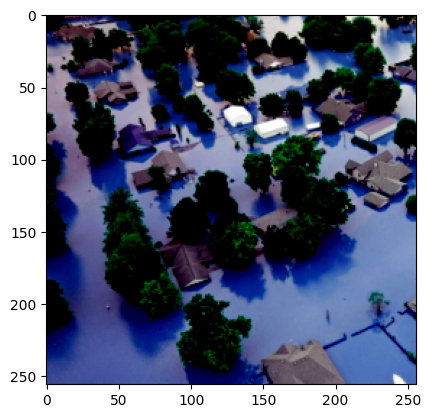

In [ ]:
# show one of the images
print(train_dataSet[0][0].shape)
print('label: ',train_dataSet[0][1])
plt.imshow(train_dataSet[0][0].permute(1, 2, 0))

# print total number of images in train_dataSet and augmented_dataSet_test
print('Number of images in augmented_dataSet_train: ', len(train_dataSet))
print('Number of images in augmented_dataSet_test: ', len(test_dataSet))

In [ ]:
# # Define the path to the image file
# image_path = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/0.jpg'

# # Open the image
# image = Image.open(image_path)

# # Display the image
# image.show()

# Data augmentation
Increase number of data by adding rotated images to the dataset

In [ ]:
# Define the transformation
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=90),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply the transformation to the image
# transformed_image = transform(image)
augmented_dataSet_train = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train', transform=transform_augmented) 
augmented_dataSet_test = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/val', transform=transform_augmented) 


torch.Size([3, 256, 256])
label:  0


Number of images in augmented_dataSet_train:  736
Number of images in augmented_dataSet_test:  186


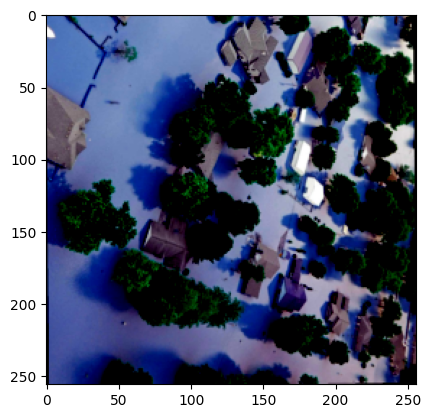

In [ ]:
# show one of the images
print(augmented_dataSet_train[0][0].shape)
print('label: ',augmented_dataSet_train[0][1])
plt.imshow(augmented_dataSet_train[0][0].permute(1, 2, 0))

# print total number of images in augmented_dataSet_train and augmented_dataSet_test
print('Number of images in augmented_dataSet_train: ', len(augmented_dataSet_train))
print('Number of images in augmented_dataSet_test: ', len(augmented_dataSet_test))

In [ ]:
augmented_train = augmented_dataSet_train + train_dataSet
augmented_test = augmented_dataSet_test + test_dataSet

print('Number of images in augmented_dataSet_train: ', len(augmented_train))
print('Number of images in augmented_dataSet_test: ', len(augmented_test))

Number of images in augmented_dataSet_train:  1472
Number of images in augmented_dataSet_test:  372


# Contrast enhancement

Brightening -> bad

In [ ]:
from PIL import Image, ImageEnhance

# Load the blurred image
img = Image.open("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/24.jpg")

# Increase the brightness of the image
enhancer = ImageEnhance.Brightness(img)
bright_img = enhancer.enhance(1.5)

# Save the brightened image
bright_img.save("brightened_image.jpg")

histogram equalization -> good

In [ ]:
from skimage import io, exposure

# Load the image
image = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/39.jpg")

# Perform histogram equalization
image_eq = exposure.equalize_hist(image)

# Save the equalized image
io.imsave("equalized_image.jpg", image_eq)

Adaptive Histogram Equalization -> bad

In [ ]:
import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/39.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=0.05, tileGridSize=(4,4))
# clipLimit parameter controls the amount of contrast enhancement
# tileGridSize parameter controls the size of the tiles used for the histogram equalization.

img_eq = clahe.apply(img)

# Save the equalized image
cv2.imwrite('adaptive_histo_eq.jpg', img_eq)

True

Contrast Limited Adaptive Histogram Equalization (CLAHE) -> good

In [ ]:
from skimage import exposure, io

# Load the image
image = io.imread("/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/39.jpg")

# Apply CLAHE
img_eq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Save the equalized image
io.imsave('cotrastLimit_adaptive_histo_eq.jpg', img_eq)

Retinex -> gives error

In [ ]:
# #  Retinex contrast enhancement

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def retinex(img, sigma_list):
#     retinex = np.zeros_like(img)
#     for sigma in sigma_list:
#         img_blur = cv2.GaussianBlur(img, (0, 0), sigma)
#         img_log = np.log10(img+1e-3) - np.log10(img_blur+1e-3)
#         retinex += img_log
#     retinex = retinex / len(sigma_list)
#     return retinex

# def MSRCP(img, sigma_list):
#     img = np.float64(img) + 1.0
#     retinex = np.zeros_like(img)
#     for sigma in sigma_list:
#         img_blur = cv2.GaussianBlur(img, (0, 0), sigma)
#         retinex += np.log10(img) - np.log10(img_blur)
#     retinex = retinex / len(sigma_list)
#     return retinex

# def main():
#     img = cv2.imread('test.jpg')
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     sigma_list = [15, 80, 250]
#     retinex_img = retinex(img_gray, sigma_list)
#     retinex_img = np.clip(retinex_img, 0, 1)
#     retinex_img = (retinex_img * 255).astype(np.uint8)
#     plt.imshow(retinex_img, cmap='gray')
#     plt.show()

# if __name__ == '__main__':
#     main()


In [ ]:
# import cv2
# import numpy as np

# # Load the image
# img = cv2.imread('flood_image.jpg')

# # Convert to float32
# img_float32 = np.float32(img)

# # Compute the illumination and reflectance components using Retinex
# sigma_list = [15, 80, 250]
# G = np.zeros_like(img_float32)
# for sigma in sigma_list:
#     G += cv2.GaussianBlur(img_float32, (0, 0), sigma) - cv2.GaussianBlur(img_float32, (0, 0), 10)
# img_illuminance = np.mean(G, axis=-1)
# img_reflectance = img_float32 / img_illuminance[:,:,np.newaxis]

# # Enhance the contrast of the reflectance component
# img_reflectance_eq = cv2.equalizeHist(np.uint8(img_reflectance))

# # Compute the enhanced image
# img_eq = np.uint8(img_illuminance[:,:,np.newaxis] * img_reflectance_eq)

# # Save the equalized image
# cv2.imwrite('flood_image_eq.jpg', img_eq)

Unsupervised Feature Learning

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import io

# Load the image
img = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/47.jpg', as_gray=True)

# Convert to float32
img = np.float32(img)

# Normalize the image
img -= np.mean(img)
img /= np.std(img)

# Create a neural network with one hidden layer
input_shape = img.shape
hidden_size = 32
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=hidden_size, activation='sigmoid'),
    tf.keras.layers.Dense(units=input_shape[0]*input_shape[1], activation=None),
    tf.keras.layers.Reshape(target_shape=input_shape)
])

# Train the neural network using the image data
model.compile(optimizer='adam', loss='mse')
model.fit(x=np.array([img]), y=np.array([img]), epochs=10, batch_size=1)

# Use the learned features to enhance the contrast of the image
img_eq = model.predict(np.array([img]))[0]

# Save the equalized image
io.imsave('unsupervised_eq.jpg', img_eq)

Epoch 1/10


# De-noising

# Image segmetation (for colorig regios of floodig)
* Edge detection
* Thresholding
* Clustering

No need for balancig because the no-flooding and flooding images have the same number (about 500 images) 